# Final Report #

## Introduction

Nowadays, crime has become a severe problem around the world and is increasing in our society, making people feel anxious and unsafe all the time. Research showed many young people from US and Canadian colleges expressed being fearful of crime on and off campus (Leah E Daigle et al, 2021), which arises people’s thinking on the factors related to committing a crime. According to National Research Council (2008), factors such as the state of economic opportunity, demographic groups and etc. may have a relationship with crime. Therefore, we decided to use the Communities and Crime Data Set acquired from UCI Machine Learning Repository by Michael Redmond to examine both the inference and predictive question: **For one specific state in US, California, among the factors of population density, young age rate, urbanization, income, poverty, education, unemployment, divorce rate and the number of people in a family, which ones are associated with a total crime number, and what variables can build up the best model to predict the total crime number?**
 
 
Our data set includes real data from socio-economic data from the 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crime data from the 1995 FBI UCR. This dataset contains a total number of 128 attributes and 1994 instances. In our study, we will focus on one specific state in US, California, therefore we will use 278 instances of the data (which are instances of California). Also, we will not use all of the variables in the dataset but chose 11 variables we are interested to study (10 explanatory variables and 1 response variable). In this study, our focus is both inference and predictive, and we will use the linear regression model to study both of them.

## Methods and Results

In [1]:
library(tidyverse)
library(repr)
library(readxl)
library(infer)
library(cowplot)
library(GGally)
library(broom)
library(dplyr)
library(faux)
library(digest)
library(car)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


************
Welcome to faux. For support and examples visit:
https://debruine.github.io/faux/
- Get and set global package options with: faux_options()
************


Attaching package: ‘faux’


The following object is masked from ‘package:purrr’:

    %||%


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




### Load Data

We first read the `communities.data` in data file and named it `crime_data`. 

In [2]:
set.seed(4)
crime_data <- read_csv("data/communities.data", col_names = FALSE)

head(crime_data)

Rows: 1994 Columns: 128
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (26): X2, X3, X4, X31, X102, X103, X104, X105, X106, X107, X108, X109, ...
dbl (102): X1, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1 X2 X3    X4                  X5 X6   X7   X8   X9   X10  ⋯ X119 X120 X121
1  8 ?  ?     Lakewoodcity        1  0.19 0.33 0.02 0.90 0.12 ⋯ 0.12 0.26 0.20
2 53 ?  ?     Tukwilacity         1  0.00 0.16 0.12 0.74 0.45 ⋯ 0.02 0.12 0.45
3 24 ?  ?     Aberdeentown        1  0.00 0.42 0.49 0.56 0.17 ⋯ 0.01 0.21 0.02
4 34 5  81440 Willingborotownship 1  0.04 0.77 1.00 0.08 0.12 ⋯ 0.02 0.39 0.28
5 42 95 6096  Bethlehemtownship   1  0.01 0.55 0.02 0.95 0.09 ⋯ 0.04 0.09 0.02
6  6 ?  ?     SouthPasadenacity   1  0.02 0.28 0.06 0.54 1.00 ⋯ 0.01 0.58 0.10
  X122 X123 X124 X125 X126 X127 X128
1 0.06 0.04 0.9  0.5  0.32 0.14 0.20
2 ?    ?    ?    ?    0.00 ?    0.67
3 ?    ?    ?    ?    0.00 ?    0.43
4 ?    ?    ?    ?    0.00 ?    0.12
5 ?    ?    ?    ?    0.00 ?    0.03
6 ?    ?    ?    ?    0.00 ?    0.14

*Table 1.1 Raw dataset*

### Clean and Wrangle Data

We find that, in some of the variables, not all of the values are completely collected, so we select the variables with no missed data.

Then we add the descripitions of each data we selected according to the `communities.names` file as follow:

- X1 -- `state`: US state (by number) - not counted as predictive above, but if considered, should be consided nominal (nominal)

- X6 -- `popComm`: population for community: (numeric - decimal)

- X14 -- `agePct16t24`: percentage of population that is 16-24 in age (numeric - decimal)

- X17 -- `pctUrban`: percentage of people living in areas classified as urban (numeric - decimal)<br>
      (In this variable, we are interested in whether or not there is people living in areas classified as urban, so we decide to change the datatype of this variable to categorical variable. We decide to classify the data with a percentage of 0 as `non-urban`, which means that *no one lives in an urban area*, and we classified the data with a percentage larger than 0 as `urban`, which means that *there are people living in cities*.)

- X26 -- `perCapInc`: per capita income (numeric - decimal)

- X34 -- `pctUnderPov`: percentage of people under the poverty level (numeric - decimal)

- X36 -- `pctNotHSGrad`: percentage of people 25 and over that are not high school graduates (numeric - decimal)

- X38 -- `pctUnemployed`: percentage of people 16 and over, in the labor force, and unemployed (numeric - decimal)

- X47 -- `pctDiv`: percentage of population who are divorced (numeric - decimal)

- X48 -- `meanPerFam`: mean number of people per family (numeric - decimal)

- X128 -- `totCrimesPerPop`: total number of violent crimes per 100K popuation (numeric - decimal) GOAL attribute (to be predicted)

We call the new dataset `crime` and print the first and last 6 rows in the `crime`.

We also count the total number of row in `crime` and assume it as the population of our research.

In [3]:
crime <- crime_data %>%
  select(X1,X6,X14,X17,X26,X34,X36,X38,X47,X48,X128)%>%
  rename(state = X1,
         popComm = X6,
         agePct16t24 = X14,
         pctUrban = X17,
         perCapInc = X26,
         pctUnderPov = X34,
         pctNotHSGrad = X36,
         pctUnemployed = X38,
         pctDiv = X47,
         meanPerFam = X48,
         totCrimesPerPop = X128)
crime$pctUrban <- if_else(crime$pctUrban > 0,
                 "urban","non-urban")
crime <- crime%>%
  mutate(pctUrban = as_factor(pctUrban))

head(crime)
tail(crime)
nrow(crime)

state popComm agePct16t24 pctUrban  perCapInc pctUnderPov pctNotHSGrad
1  8    0.19    0.29        urban     0.40      0.19        0.18        
2 53    0.00    0.35        urban     0.37      0.24        0.24        
3 24    0.00    0.28        non-urban 0.27      0.27        0.43        
4 34    0.04    0.34        urban     0.36      0.10        0.25        
5 42    0.01    0.23        urban     0.43      0.06        0.30        
6  6    0.02    0.27        urban     0.72      0.12        0.12        
  pctUnemployed pctDiv meanPerFam totCrimesPerPop
1 0.27          0.75   0.35       0.20           
2 0.27          1.00   0.29       0.67           
3 0.36          0.70   0.45       0.43           
4 0.33          0.44   0.75       0.12           
5 0.12          0.21   0.51       0.03           
6 0.10          0.58   0.44       0.14

state popComm agePct16t24 pctUrban  perCapInc pctUnderPov pctNotHSGrad
1 28    0.02    0.43        non-urban 0.17      0.76        0.62        
2 12    0.01    0.35        urban     0.49      0.16        0.11        
3  6    0.05    0.73        urban     0.18      0.32        0.37        
4  9    0.16    0.31        urban     0.31      0.31        0.58        
5 25    0.08    0.63        urban     0.40      0.16        0.35        
6  6    0.20    0.40        urban     0.24      0.35        0.55        
  pctUnemployed pctDiv meanPerFam totCrimesPerPop
1 0.61          0.64   0.53       0.19           
2 0.12          0.53   0.35       0.09           
3 0.24          0.48   0.71       0.45           
4 0.50          0.52   0.47       0.23           
5 0.37          0.32   0.46       0.19           
6 0.47          0.57   0.86       0.48

[1] 1994

*Table 1.2 & 1.3 Dataset with variables of interest*

We want to do the study based on one specific state rather than all of the states. Also, we want the state has enough instances for us to study, therefore, we chose the state with the most instances.

In [4]:
state_crime <- crime %>%
group_by(state)%>%
count()
max = max(state_crime$n)
state_crime[which(state_crime['n'] == max),]

state n  
1 6     278

*Table 1.4 State with maximum size of instances*

As shown above, the state with area code 6, which is California (the name of corresponding state was not shown in the original data source but we searched it online), has the most instances. We `filter` out the instances of California and call the new dataset `clean_crime`. We will do our study based on `clean_crime`.

In [5]:
clean_crime <- crime %>%
filter(state == 6) %>%
select(-state)
head(clean_crime)

popComm agePct16t24 pctUrban  perCapInc pctUnderPov pctNotHSGrad
1 0.02    0.27        urban     0.72      0.12        0.12        
2 0.01    0.36        non-urban 0.10      0.64        0.82        
3 0.13    0.35        urban     0.33      0.18        0.36        
4 0.04    0.30        urban     0.79      0.18        0.14        
5 0.25    0.28        urban     0.29      0.34        0.43        
6 0.02    0.39        non-urban 0.08      0.63        1.00        
  pctUnemployed pctDiv meanPerFam totCrimesPerPop
1 0.10          0.58   0.44       0.14           
2 1.00          0.52   0.78       0.55           
3 0.32          0.46   0.85       0.24           
4 0.19          0.66   0.35       0.21           
5 0.59          0.67   0.60       0.34           
6 1.00          0.33   1.00       0.31

*Table 1.5 Dataset with variables of interest of California*

### View Data Visually

We first want to have a look at the distribution of the response variable `totCrimesPerPop`. We use `geom_histogram` to plot the distribution.

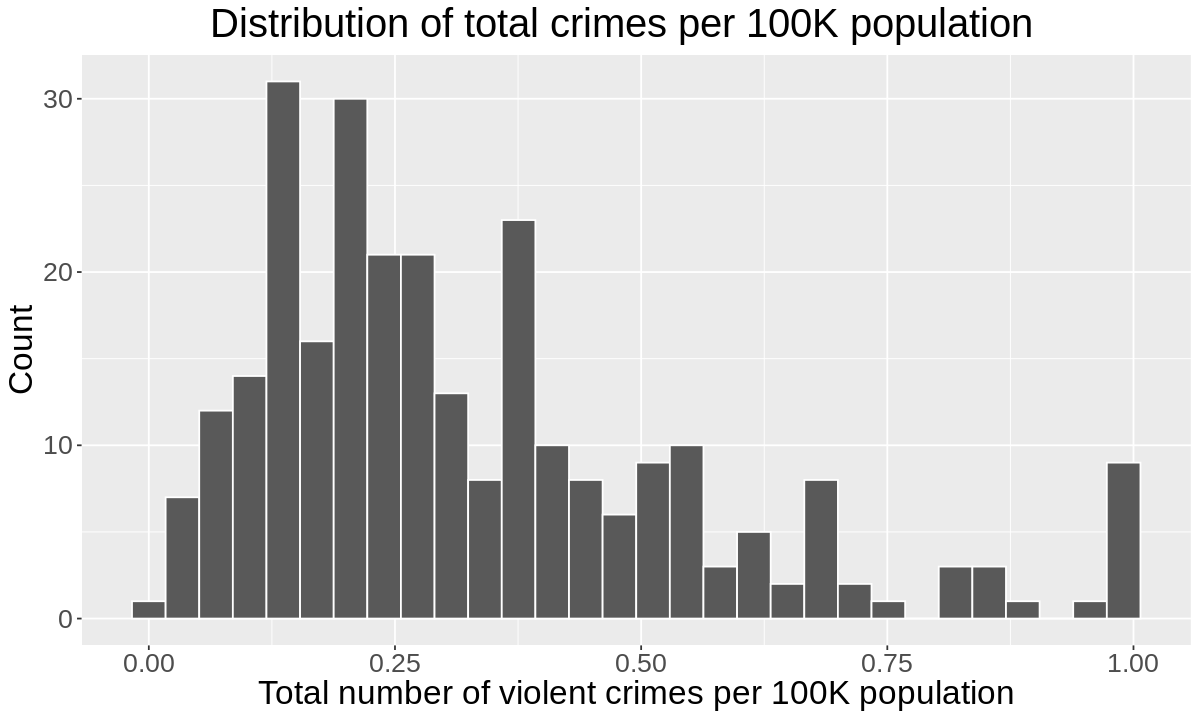

In [6]:
options(repr.plot.width = 10, repr.plot.height = 6)

tot_crime_dist <- clean_crime %>%
    ggplot(aes(x = totCrimesPerPop)) +
    geom_histogram(bins = 30, color = "white") +
    xlab("Total number of violent crimes per 100K population") +
    ylab("Count") +
    ggtitle("Distribution of total crimes per 100K population") +
    theme(text = element_text(size = 20)) +
    theme(plot.title = element_text(hjust = 0.45))
tot_crime_dist

*Figure 1.1 Distribution of total number of vioment crimes per 100K population*

Then, we want to see if there's any association between the quantitative input variables. Thus, we eliminated categorical variables `state` and `pctUrban` and call this dataset `continuous_var`.

In [8]:
continuous_var <- clean_crime%>%
  select(-pctUrban)
head(continuous_var)

popComm agePct16t24 perCapInc pctUnderPov pctNotHSGrad pctUnemployed pctDiv
1 0.02    0.27        0.72      0.12        0.12         0.10          0.58  
2 0.01    0.36        0.10      0.64        0.82         1.00          0.52  
3 0.13    0.35        0.33      0.18        0.36         0.32          0.46  
4 0.04    0.30        0.79      0.18        0.14         0.19          0.66  
5 0.25    0.28        0.29      0.34        0.43         0.59          0.67  
6 0.02    0.39        0.08      0.63        1.00         1.00          0.33  
  meanPerFam totCrimesPerPop
1 0.44       0.14           
2 0.78       0.55           
3 0.85       0.24           
4 0.35       0.21           
5 0.60       0.34           
6 1.00       0.31

*Table 1.6 Dataset with continuous variables of interest*

Now we explore (visually) the association between variables in the dataset. We use the plotting function `ggpairs()`, from the library `GGally`, to generate a pair plot of ALL the variables found in `continuous_var`. The `ggplot()` object’s name is `crime_pair_plots`.

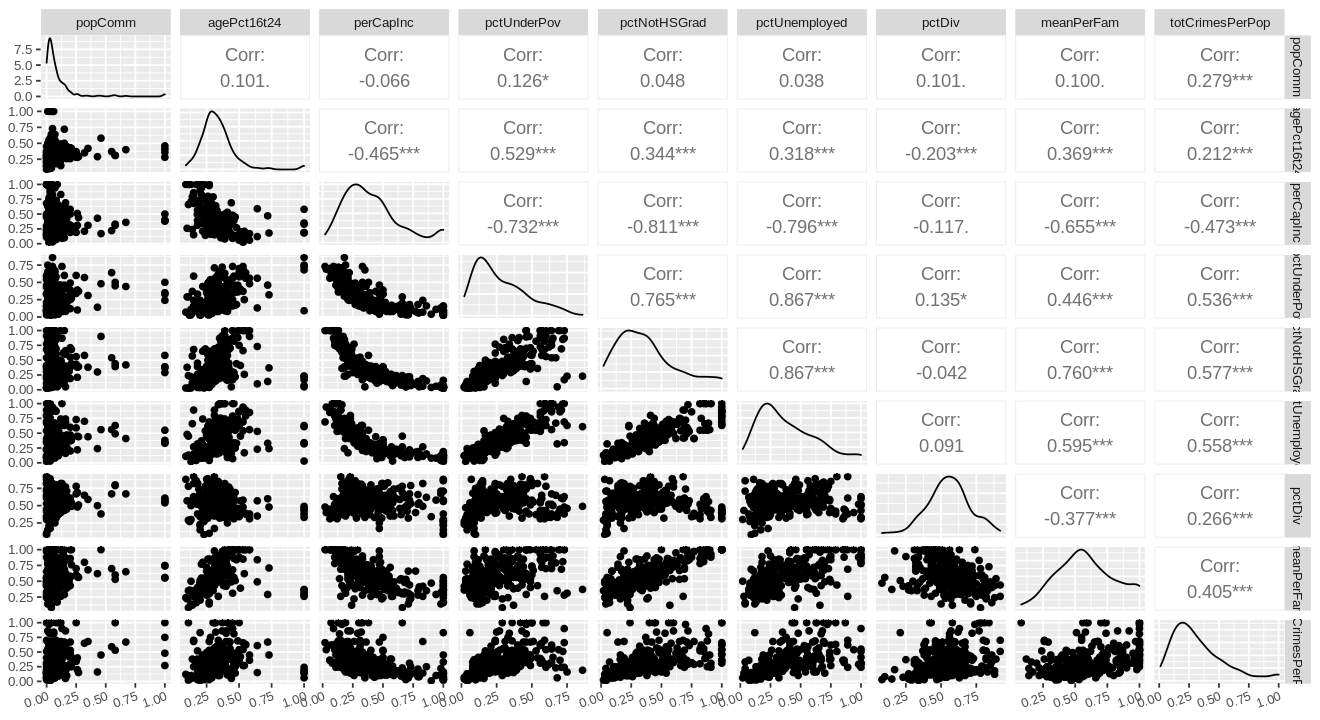

In [9]:
options(repr.plot.width = 11, repr.plot.height = 6)

crime_pair_plots <- continuous_var %>%
    ggpairs(progress = FALSE) +
  theme(
    text = element_text(size = 10),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold"),
    axis.text.x = element_text(angle = 20, hjust = 1)
)
crime_pair_plots

*Figure 1.2 Pair plots of input (continuous) variables*

We also want to see the relationship between `pctUrban` and `totCrimesPerPop`. We use `geom_boxplot()` to visualize their relationship.

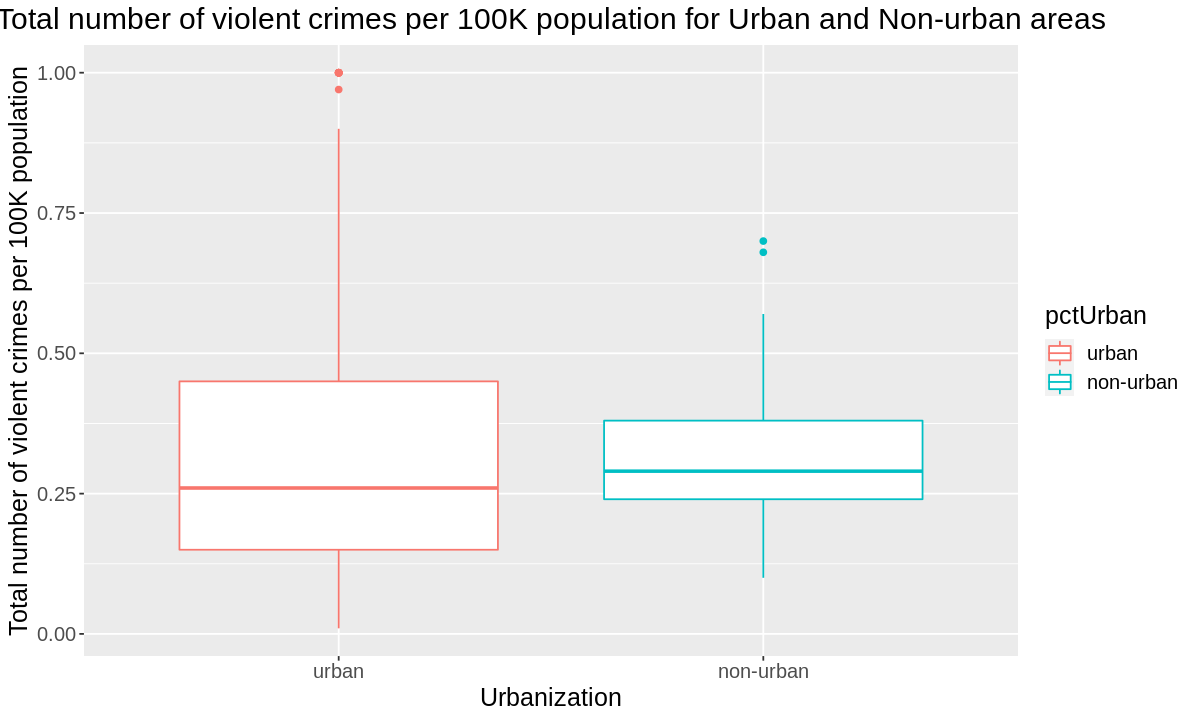

In [10]:
options(repr.plot.width = 10, repr.plot.height = 6)

urban_totCrime_boxplot <- 
    clean_crime %>%
    ggplot(aes(x = pctUrban, y = totCrimesPerPop , color = pctUrban)) +
    geom_boxplot() +
    xlab("Urbanization") +
    ylab("Total number of violent crimes per 100K population") +
    ggtitle("Total number of violent crimes per 100K population for Urban and Non-urban areas") +
    theme(text = element_text(size = 15)) +
    theme(plot.title = element_text(hjust = 0.5))

urban_totCrime_boxplot

*Figure 1.3 Boxplot of relationship between urbanization and total number of vioment crimes per 100K population*

### Statistics of Data

Next, we want to summarize the statistics of all of the continuous variables in our dataset and we call this summary table `crime_summary`.

In [12]:
crime_summary <-
    clean_crime %>%
    select(-pctUrban) %>%
    pivot_longer(cols = everything()) %>%
    group_by(name) %>% 
    summarise(
    mean = mean(value,na.rm = T),
    sd = sd(value,na.rm = T),
    median = median(value, na.rm = T),
    variance = var(value, na.rm = T),
    max = max(value, na.rm = T),
    min = min(value, na.rm = T))

crime_summary

name            mean       sd        median variance   max  min 
1 agePct16t24     0.33406475 0.1373223 0.310  0.01885743 1.00 0.09
2 meanPerFam      0.59312950 0.2219651 0.575  0.04926851 1.00 0.08
3 pctDiv          0.55500000 0.1502267 0.550  0.02256805 0.92 0.08
4 pctNotHSGrad    0.37967626 0.2516220 0.335  0.06331361 1.00 0.02
5 pctUnderPov     0.27661871 0.1807827 0.230  0.03268239 0.86 0.02
6 pctUnemployed   0.38611511 0.2341064 0.330  0.05480579 1.00 0.02
7 perCapInc       0.40586331 0.2344757 0.350  0.05497885 1.00 0.02
8 popComm         0.08992806 0.1442471 0.050  0.02080722 1.00 0.00
9 totCrimesPerPop 0.33046763 0.2261883 0.265  0.05116115 1.00 0.01

*Table 1.7 Summary table of statistics of continuous variables*

Next, we start to analyze the data.

### Assumption Checkings

In [15]:
# check heteroscedasticity
full_model <- lm(log(totCrimesPerPop) ~., data = clean_crime)
full_model_results <- tidy(full_model, conf.int = TRUE) %>% mutate_if(is.numeric, round, 2)
full_model_results

term              estimate std.error statistic p.value conf.low conf.high
1  (Intercept)       -3.44    0.39      -8.73     0.00    -4.21    -2.66    
2  popComm            0.77    0.22       3.49     0.00     0.33     1.20    
3  agePct16t24        0.47    0.33       1.42     0.16    -0.18     1.11    
4  pctUrbannon-urban -0.17    0.10      -1.69     0.09    -0.37     0.03    
5  perCapInc         -0.19    0.28      -0.69     0.49    -0.74     0.35    
6  pctUnderPov       -0.09    0.45      -0.19     0.85    -0.97     0.80    
7  pctNotHSGrad       1.29    0.32       4.00     0.00     0.65     1.92    
8  pctUnemployed      0.24    0.39       0.63     0.53    -0.52     1.00    
9  pctDiv             2.03    0.28       7.31     0.00     1.48     2.57    
10 meanPerFam         0.47    0.29       1.64     0.10    -0.10     1.04

*Table 1.8*

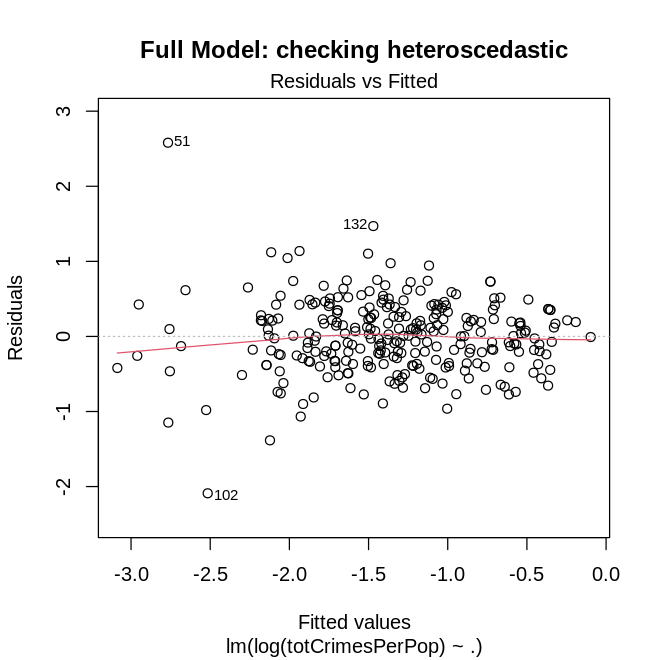

In [17]:
options(repr.plot.width = 5.5, repr.plot.height = 5.5)

plot(full_model, 1, main = "Full Model: checking heteroscedastic")

*Figure 1.4*

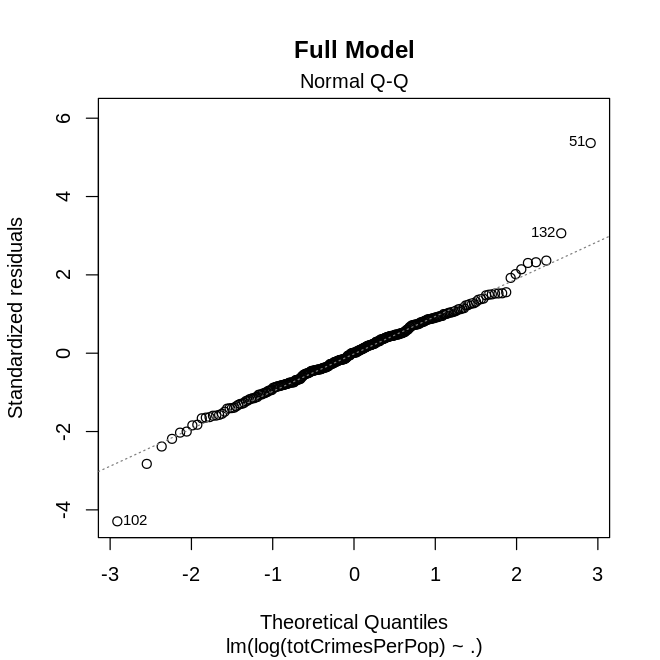

In [18]:
# Check Normality
plot(full_model, 2, main = "Full Model")

*Figure 1.5*

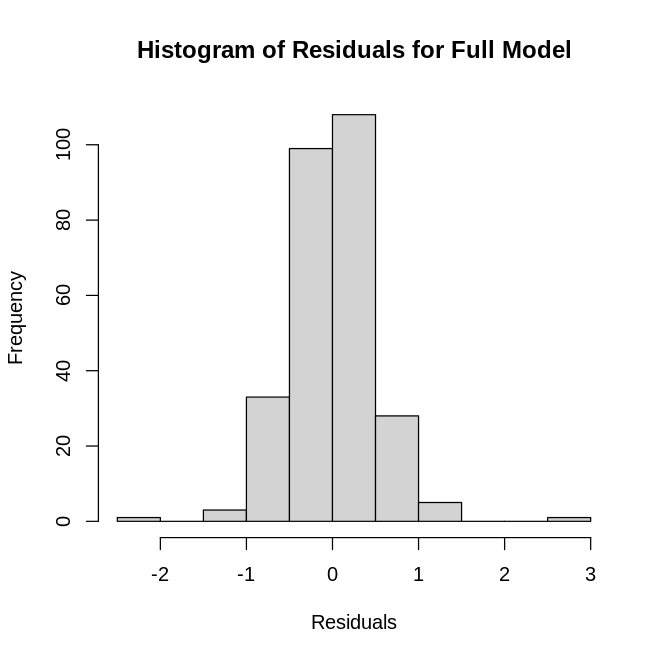

In [19]:
hist(residuals(object = full_model),
  breaks = 10,
  main = "Histogram of Residuals for Full Model",
  xlab = "Residuals"
)


*Figure 1.6*

In [20]:
# Check Multicollinearity
corr_matrix_crime <- 
    clean_crime %>%
    select(- pctUrban) %>%
    cor() %>%
    as.data.frame() %>%
    rownames_to_column("var1") %>%
    pivot_longer(- var1, names_to = "var2", values_to = "corr")
head(corr_matrix_crime)

#!!! need more description// might need to drop those with high multicolinearity

var1    var2          corr       
1 popComm popComm        1.00000000
2 popComm agePct16t24    0.10125574
3 popComm perCapInc     -0.06563080
4 popComm pctUnderPov    0.12584493
5 popComm pctNotHSGrad   0.04808012
6 popComm pctUnemployed  0.03843491

In [21]:
# get vif of variables
VIF_full_model <- vif(full_model)
round(VIF_full_model, 3)

popComm   agePct16t24      pctUrban     perCapInc   pctUnderPov 
        1.143         2.324         1.501         4.794         7.432 
 pctNotHSGrad pctUnemployed        pctDiv    meanPerFam 
        7.448         9.316         1.970         4.622

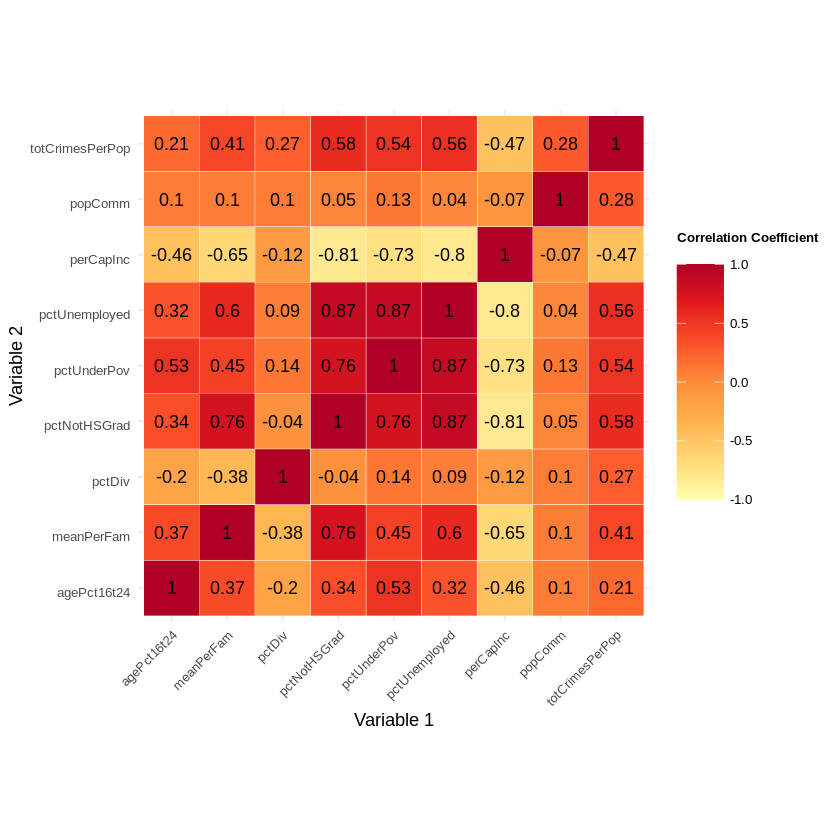

In [22]:
# plot vif
options(repr.plot.width = 7, repr.plot.height = 7)

plot_corr_matrix_crime <- corr_matrix_crime %>%
  ggplot(aes(var1, var2)) +
  geom_tile(aes(fill = corr), color = "white") +
  scale_fill_distiller("Correlation Coefficient \n",
    palette =  "YlOrRd",
    direction = 1, limits = c(-1,1)
  ) +
  labs(x = "Variable 1", y = "Variable 2") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(
      angle = 45, vjust = 1,
      size = 8, hjust = 1
    ),
    axis.text.y = element_text(
      vjust = 1,
      size = 8, hjust = 1
    ),
    legend.title = element_text(size = 8, face = "bold"),
    legend.text = element_text(size = 8),
    legend.key.size = unit(1, "cm")
  ) +
  coord_fixed() +
  geom_text(aes(var1, var2, label = round(corr, 2)), color = "black", size = 3.8)
plot_corr_matrix_crime

### Split the data into training set and testing set

In [ ]:
set.seed(301)

clean_crime$ID <- 1:nrow(clean_crime)
training_crime <- sample_n(clean_crime, size = nrow(clean_crime) * 0.60,
  replace = FALSE
)

testing_crime <- anti_join(clean_crime,
  training_crime,
  by = "totCrimesPerPop"
)

# removing the totCrimesPerPop variable

training_crime <- training_crime %>% select(-"totCrimesPerPop")
testing_crime <- testing_crime %>% select(-"totCrimesPerPop")

### For Inference Model

### Model Selection

### Model Evaluation

### For Prediction Model

### Model Selection

### Model Evaluation